In [1525]:
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')
inventory_adjusted = inventory.copy()

<ipython-input-1525-e23378cc4b8c>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')


***Task 1: Data Investigation***

In [1526]:
inventory.head(600)

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2006,AA,American Airlines Inc.,1985.0,American Airlines Inc.,49306,N294AA,A,Y,140.0,MCDONNELL-DOUGLAS,NaN,MD-80,37600.0,12/21/1985 12:00:00 AM,19805.0,AA
596,2006,AA,American Airlines Inc.,1985.0,American Airlines Inc.,49307,N295AA,A,Y,140.0,MCDONNELL-DOUGLAS,NaN,MD-80,37600.0,12/21/1985 12:00:00 AM,19805.0,AA
597,2006,AA,American Airlines Inc.,1985.0,American Airlines Inc.,49308,N296AA,A,Y,140.0,MCDONNELL-DOUGLAS,NaN,MD-80,37600.0,12/21/1985 12:00:00 AM,19805.0,AA
598,2006,AA,American Airlines Inc.,1985.0,American Airlines Inc.,49366,N917TW,O,N,131.0,MCDONNELL-DOUGLAS,NaN,MD-80,39800.0,5/23/1992 12:00:00 AM,19805.0,AA


In [1527]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

Carrier:

In [1529]:
inventory[inventory['CARRIER'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


In [1530]:
inventory[inventory['CARRIER_NAME'] == 'North American Airlines']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


The missing values for Carrier, or "NaN" values, only occur for North American Airlines. This is most likely because when the csv was read into pandas, the "NA" abbreviation from the file was read to mean there was no data available when in reality the abbreviation was just NA. This is supported by analyzing the original csv file at those places and seeing that it is in fact the "NA" abbreviation and not NaN in those positions. It is fixed below:

In [1531]:
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER_NAME'] == 'North American Airlines'), ['CARRIER', 'UNIQUE_CARRIER']] = str('NA')
inventory_adjusted[inventory_adjusted['CARRIER_NAME'] == 'North American Airlines']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NA,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NA
11777,2007,NA,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NA
11778,2007,NA,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NA
11779,2007,NA,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NA
11780,2007,NA,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NA
11781,2007,NA,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NA
11782,2007,NA,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NA
11783,2007,NA,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NA
11784,2007,NA,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NA
11785,2007,NA,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NA


Carrier Name:

In [1532]:
inventory[inventory['CARRIER_NAME'].isnull()]['CARRIER'].value_counts()

,count
CARRIER,
OH,97
L4,8


In [1533]:
inventory[inventory['CARRIER'] == 'L4']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
11470,2007,L4,NaN,2007.0,NaN,4176,N506LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/31/2007 12:00:00 AM,NaN,NaN
11471,2007,L4,NaN,2007.0,NaN,4181,N507LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,NaN
11472,2007,L4,NaN,2007.0,NaN,4182,N508LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,NaN
18739,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,21217.0,L3
18740,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,21217.0,L3


In [1534]:
inventory[(inventory['CARRIER'] == 'OH') & (inventory['YEAR'] == 2013) & (inventory['CARRIER_NAME'].isnull())]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOMBARDIER,97


In [1535]:
inventory[(inventory['CARRIER'] == 'OH') & (inventory['MANUFACTURER'] == "BOMBARDIER")]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
12384,2007,OH,Comair Inc.,2007.0,Comair Inc.,15092,N692CA,O,Y,76.0,BOMBARDIER,NaN,CRJ-900,75000.0,10/26/2007 12:00:00 AM,20417.0,OH
12385,2007,OH,Comair Inc.,2007.0,Comair Inc.,15096,N693CA,O,Y,76.0,BOMBARDIER,NaN,CRJ-900,75000.0,11/20/2007 12:00:00 AM,20417.0,OH
12386,2007,OH,Comair Inc.,2007.0,Comair Inc.,15097,N695CA,O,Y,76.0,BOMBARDIER,NaN,CRJ-900,75000.0,12/6/2007 12:00:00 AM,20417.0,OH
12387,2007,OH,Comair Inc.,2007.0,Comair Inc.,15125,N678CA,O,Y,76.0,BOMBARDIER,NaN,CRJ-900,75000.0,9/10/2007 12:00:00 AM,20417.0,OH
12388,2007,OH,Comair Inc.,2007.0,Comair Inc.,15127,N676CA,O,Y,76.0,BOMBARDIER,NaN,CRJ-900,75000.0,8/24/2007 12:00:00 AM,20417.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


For Carrier Name, there are two cases for which the Name returns NaN. First, for the Carrier L4 in 2007 and for the Carrier OH in 2013. Since the missing information is directly tied to years (all data for those Carriers in those respective years is NaN) it indicates that the data is "MAR", or Missing At Random. This was confermed by isolating the data by carrier and by year after recognizing that only these two Carrier's had Carrier_Name's that returned NaN data. By aligning the manufacturer to the existing information, it was identified that all "L4" Carriers with missing carrier names should be "Lynx Aviation d/b/a Frontier Airlines" and all "OH" Carriers with missing carrier names should be "Comair Inc." The imputation is done below:

In [1536]:

inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == 'L4') & (inventory_adjusted['CARRIER_NAME'].isna()),
    ['CARRIER_NAME']
] = ['Lynx Aviation d/b/a Frontier Airlines']

inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == 'OH') & (inventory_adjusted['CARRIER_NAME'].isna()),
    'CARRIER_NAME'
] = 'Comair Inc.'


In [1537]:
inventory_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132313 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

Manufacture Year:

In [1538]:
inventory[inventory['MANUFACTURE_YEAR'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


In [1539]:
inventory[(inventory['CARRIER'] == '5Y') & (inventory['YEAR'] == 2022)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
116652,2022,5Y,Atlas Air Inc.,1988.0,Atlas Air Inc.,24086,N1709A,B,Y,269.0,BOEING,6261,B767-300ER,0.0,11/6/2018 12:00:00 AM,20007.0,5Y
116653,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24309,N249BA,B,Y,0.0,BOEING,8192,B747-400,265000.0,9/1/2010 12:00:00 AM,20007.0,5Y
116654,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24318,N1511A,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,11/9/2017 12:00:00 AM,20007.0,5Y
116655,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,24310,N780BA,B,Y,0.0,BOEING,8192,B747-400,0.0,10/1/2010 12:00:00 AM,20007.0,5Y
116656,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,24833,N429MC,O,Y,0.0,BOEING,8192,B747-400BCF,246600.0,10/1/2008 12:00:00 AM,20007.0,5Y
116657,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,25221,N640GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,6/1/2011 12:00:00 AM,20007.0,5Y
116658,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25132,N641GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,11/1/2011 12:00:00 AM,20007.0,5Y
116659,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25864,N649GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,6/1/2016 12:00:00 AM,20007.0,5Y
116660,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25879,N747BC,B,Y,0.0,BOEING,8192,B747-400,0.0,8/1/2010 12:00:00 AM,20007.0,5Y


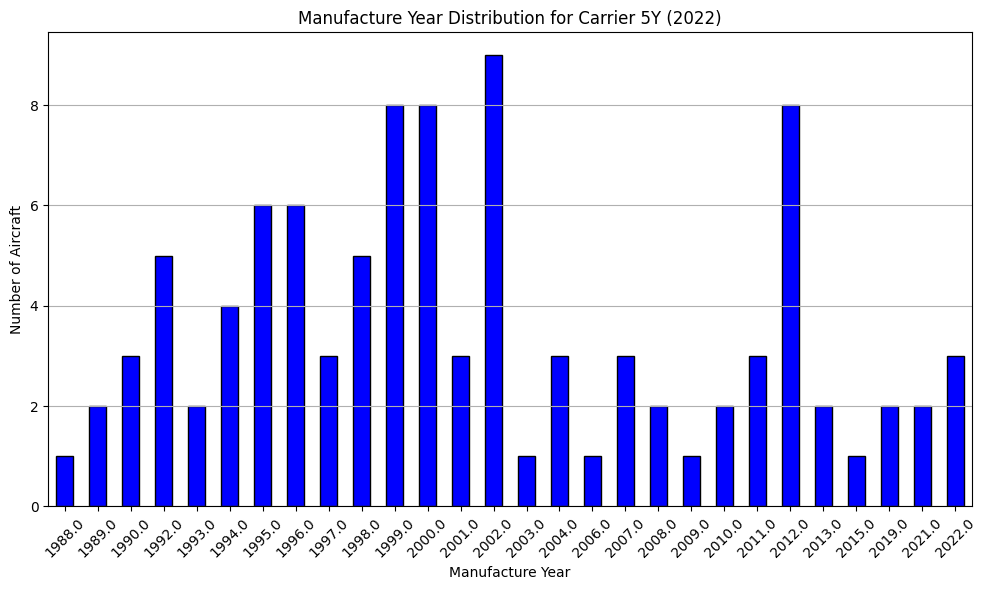

In [1540]:

carrier_5Y_2022 = inventory[(inventory['CARRIER'] == '5Y') & (inventory['YEAR'] == 2022)]
year_counts = carrier_5Y_2022['MANUFACTURE_YEAR'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Manufacture Year Distribution for Carrier 5Y (2022)')
plt.xlabel('Manufacture Year')
plt.ylabel('Number of Aircraft')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1541]:
inventory[inventory['CARRIER'] == '5Y']['MANUFACTURE_YEAR'].mean()

np.float64(1998.229197080292)

In [1542]:
inventory[inventory['CARRIER'] == '5Y']['MANUFACTURE_YEAR'].median()

1998.0

Impute for entry 116651, for which Carrier is 5Y and Carrier Name is Atlas Air Inc. In this case, the data appears to be MCAR, or Missing Completely At Random because all other aspects of the data are present and there are other entries that hold similar properties, such as the entry year being 2022 and the number of seats being 0.0, despite this appearing to be abnormal. This suggests that imputation will be sufficient, and will be conducted through imputing a constant, the median year 1998 (median was 1998, mean was 1998.23 so 1998 appeared better as distribution appeared slightly skewed.) This is done below:

In [1543]:
median_year = inventory[inventory['CARRIER'] == '5Y']['MANUFACTURE_YEAR'].median()
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == '5Y') & (inventory_adjusted['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'] = median_year
inventory_adjusted[(inventory_adjusted['CARRIER'] == '5Y') & (inventory_adjusted['YEAR'] == 2022)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,1998.0,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
116652,2022,5Y,Atlas Air Inc.,1988.0,Atlas Air Inc.,24086,N1709A,B,Y,269.0,BOEING,6261,B767-300ER,0.0,11/6/2018 12:00:00 AM,20007.0,5Y
116653,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24309,N249BA,B,Y,0.0,BOEING,8192,B747-400,265000.0,9/1/2010 12:00:00 AM,20007.0,5Y
116654,2022,5Y,Atlas Air Inc.,1989.0,Atlas Air Inc.,24318,N1511A,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,11/9/2017 12:00:00 AM,20007.0,5Y
116655,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,24310,N780BA,B,Y,0.0,BOEING,8192,B747-400,0.0,10/1/2010 12:00:00 AM,20007.0,5Y
116656,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,24833,N429MC,O,Y,0.0,BOEING,8192,B747-400BCF,246600.0,10/1/2008 12:00:00 AM,20007.0,5Y
116657,2022,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,25221,N640GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,6/1/2011 12:00:00 AM,20007.0,5Y
116658,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25132,N641GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,11/1/2011 12:00:00 AM,20007.0,5Y
116659,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25864,N649GT,O,Y,269.0,BOEING,6261,B767-300ER,237756.0,6/1/2016 12:00:00 AM,20007.0,5Y
116660,2022,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25879,N747BC,B,Y,0.0,BOEING,8192,B747-400,0.0,8/1/2010 12:00:00 AM,20007.0,5Y


Now for the other two entries:

In [1544]:
inventory[
    (inventory['CARRIER'] == '9E') &
    (inventory['AIRCRAFT_TYPE'] == '6311')]['MANUFACTURE_YEAR'].median()


2003.0

In [1545]:
inventory[
    (inventory['CARRIER'] == '9E') &
    (inventory['AIRCRAFT_TYPE'] == '6311')]['MANUFACTURE_YEAR'].mean()

np.float64(2002.9142857142858)

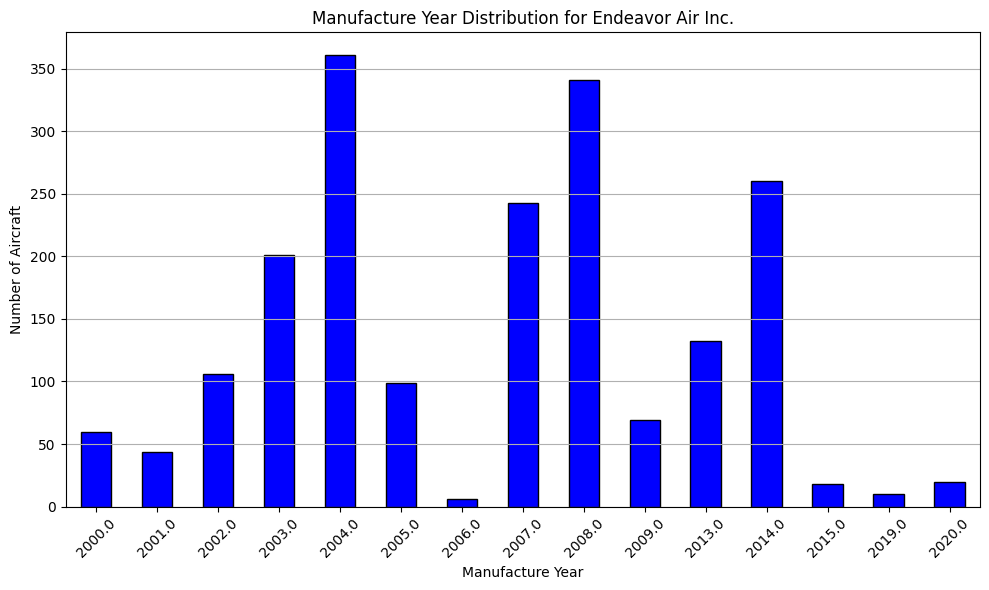

In [1546]:
carrier_name = inventory[(inventory['CARRIER_NAME'] == 'Endeavor Air Inc.')]
year_counts = carrier_name['MANUFACTURE_YEAR'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Manufacture Year Distribution for Endeavor Air Inc.')
plt.xlabel('Manufacture Year')
plt.ylabel('Number of Aircraft')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

These last two entries should impute as well because once again the data can be interpreted as MCAR because the data relates to being a 9E carrier and of the aircraft type 6311. Imputation makes sense because there are other entries that follow similar data patters so it would appear to be random (or accidentally lost). The entries will be imputed with 2003 because the median is 2003 and the mean is 2002.9, so it makes sense for the data to be slightly skewed right.

In [1547]:
median_9E = inventory[
    (inventory['CARRIER'] == '9E') &
    (inventory['AIRCRAFT_TYPE'] == '6311')]['MANUFACTURE_YEAR'].median()
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == '9E') & (inventory_adjusted['MANUFACTURE_YEAR'].isna()),
    'MANUFACTURE_YEAR'] = median_9E
inventory_adjusted[(inventory_adjusted['CARRIER'] == '9E') & (inventory_adjusted['AIRCRAFT_TYPE'] == '6311')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
101109,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10055,N317CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,9/30/2002 12:00:00 AM,20363.0,9E
101110,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10061,N331CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,10/31/2002 12:00:00 AM,20363.0,9E
101111,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10062,N340CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,3/5/2020 12:00:00 AM,20363.0,9E
101112,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10064,N354CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,1/27/2020 12:00:00 AM,20363.0,9E
101113,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10067,N355CA,O,N,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,3/31/2020 12:00:00 AM,20363.0,9E
101114,2020,9E,Endeavor Air Inc.,2002.0,Endeavor Air Inc.,10069,N367CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,12/31/2002 12:00:00 AM,20363.0,9E
101123,2020,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10075,N368CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,1/31/2003 12:00:00 AM,20363.0,9E
101124,2020,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10082,N371CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,1/31/2003 12:00:00 AM,20363.0,9E
101125,2020,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10092,N376CA,O,Y,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,7/31/2003 12:00:00 AM,20363.0,9E
101126,2020,9E,Endeavor Air Inc.,2003.0,Endeavor Air Inc.,10102,N379CA,O,N,69.0,BOMBARDIER,6311,CRJ-700LR-PSGR,18055.0,3/29/2020 12:00:00 AM,20363.0,9E


In [1548]:
inventory_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132313 non-null  object 
 3   MANUFACTURE_YEAR     132313 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

Number of Seats:

In [1549]:
inventory[inventory['NUMBER_OF_SEATS'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


In [1550]:
inventory[(inventory['CARRIER_NAME'] == 'Amerijet International') & (inventory['YEAR'] == 2019)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


In [1551]:
#6252
inventory[(inventory['CARRIER_NAME'] == 'Amerijet International') & (inventory['AIRCRAFT_TYPE'] == 6262)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
61296,2014,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
61297,2014,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
68641,2015,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
68642,2015,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
75743,2016,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
75744,2016,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
75745,2016,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,6/27/2016 12:00:00 AM,20151.0,M6
82884,2017,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
82885,2017,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
82886,2017,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,0.0,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6


Similar to with Carrier_Names, it appears that the Number_of_Seats NaN values can be represented as MAR, or Missing at Random because these values are all the Year=2019 and Carrier=M6, so therefore it would not make sense to input data for this category. However, seeing as all the Number_Of_Seats for the aircraft models 6252 and 6262 are 0.0, it makes sense for the inputed values to be 0.0. The imputation is done below:  

In [1552]:

inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == 'M6') & (inventory_adjusted['NUMBER_OF_SEATS'].isna()),
    'NUMBER_OF_SEATS'] = 0.0
inventory_adjusted[(inventory_adjusted['CARRIER'] == 'M6')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
4075,2006,M6,Amerijet International,1974.0,Amerijet International,21021,N804AJ,O,N,0.0,BOEING,NaN,B727-2,60000.0,1/1/2004 12:00:00 AM,20151.0,M6
4076,2006,M6,Amerijet International,1975.0,Amerijet International,20937,N495AJ,B,Y,0.0,BOEING,NaN,B727-2,60000.0,12/1/1994 12:00:00 AM,20151.0,M6
4077,2006,M6,Amerijet International,1975.0,Amerijet International,20942,N994AJ,B,Y,0.0,BOEING,NaN,B727-2,59571.0,9/1/1994 12:00:00 AM,20151.0,M6
4078,2006,M6,Amerijet International,1975.0,Amerijet International,21100,N395AJ,B,Y,0.0,BOEING,NaN,B727-2,60000.0,11/1/1994 12:00:00 AM,20151.0,M6
4079,2006,M6,Amerijet International,1976.0,Amerijet International,21243,N794AJ,O,Y,0.0,BOEING,NaN,B727-2,60000.0,7/1/1994 12:00:00 AM,20151.0,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128696,2023,M6,Amerijet International,1995.0,Amerijet International,27449,N432AX,b,Y,0.0,BOEING,6262,767-323,118000.0,8/29/2021 12:00:00 AM,20151.0,M6
128697,2023,M6,Amerijet International,2000.0,Amerijet International,29311,N818NH,b,Y,0.0,BOEING,6222,757-256,72000.0,6/16/2021 12:00:00 AM,20151.0,M6
128698,2023,M6,Amerijet International,2001.0,Amerijet International,32386,N192AN,b,Y,0.0,BOEING,6222,757-223,72000.0,12/15/2021 12:00:00 AM,20151.0,M6
128699,2023,M6,Amerijet International,2001.0,Amerijet International,32387,N193AN,b,Y,0.0,BOEING,6222,757-223,72000.0,3/28/2022 12:00:00 AM,20151.0,M6


In [1553]:
inventory_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132313 non-null  object 
 3   MANUFACTURE_YEAR     132313 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132313 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

Capacity_In_Pounds:

In [1554]:
inventory[inventory['CAPACITY_IN_POUNDS'].isnull()]['CARRIER'].value_counts()

,count
CARRIER,
FX,96
5Y,3
NK,2


In [1555]:
#inventory[(inventory['CAPACITY_IN_POUNDS'].isnull()) & (inventory['CARRIER'] == 'NK')]
inventory[(inventory['AIRCRAFT_TYPE'] == 7221) & (inventory['CARRIER'] == 'NK') & (inventory['MANUFACTURE_YEAR'] == 2018.0)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
90567,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/17/2018 12:00:00 AM,20416.0,NK
90569,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8668,N910NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/20/2018 12:00:00 AM,20416.0,NK
97876,2019,NK,Spirit Air Lines,2018.0,Spirit Air Lines,7788,N906NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGR,35000.0,4/3/2019 12:00:00 AM,20416.0,NK
97877,2019,NK,Spirit Air Lines,2018.0,Spirit Air Lines,7851,N915NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGR,35000.0,2/28/2019 12:00:00 AM,20416.0,NK
97879,2019,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8038,N912NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGR,35000.0,2/12/2019 12:00:00 AM,20416.0,NK
97892,2019,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGR,35600.0,12/17/2018 12:00:00 AM,20416.0,NK
97894,2019,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8668,N910NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGR,35600.0,12/20/2018 12:00:00 AM,20416.0,NK


In [1556]:
#90567 and 90569 should have capacity of 35600.0 because same other data as 97892 and 97894, respectively .
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == 'NK') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna()),
    'CAPACITY_IN_POUNDS'] = 35600.0
inventory_adjusted[(inventory_adjusted['CARRIER'] == 'NK') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna())]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER


In [1557]:
inventory[(inventory['CARRIER'] == '5Y') & (inventory['CAPACITY_IN_POUNDS'].isnull())]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y


In [1558]:
inventory[(inventory['CARRIER'] == '5Y') & (inventory['MODEL'] == 'B767-200') & (inventory['NUMBER_OF_SEATS'] == 181.0)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
71830,2016,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,237756.0,7/1/2013 12:00:00 AM,20007.0,5Y
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y


For this missing capacity value, all the other variables are identical in comparison to unit 71830, so the capacity will be updated to reflect this one (capacity = 237756.0).

In [1559]:
inventory[(inventory['CARRIER'] == '5Y') & (inventory['MODEL'] == 'B767-300') & (inventory['NUMBER_OF_SEATS'] == 0.0)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
36692,2011,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,25221,N640MC,O,Y,0.0,BOEING,6261,B767-300,237756.0,3/9/1997 12:00:00 AM,20007.0,5Y
36694,2011,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25132,N641MC,O,Y,0.0,BOEING,6261,B767-300,237756.0,3/9/1997 12:00:00 AM,20007.0,5Y
71855,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/17/2013 12:00:00 AM,20007.0,5Y
71856,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/22/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y


Similar to above, the two missing values here as well reflect the other entries with the same number of seats and model, so therefore share the capacity of 237756.0. The imputation for all 3 "5Y" entries is done below:

In [1560]:
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER'] == '5Y') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna()),
    'CAPACITY_IN_POUNDS'] = 237756.0

In [1561]:
inventory_adjusted[inventory_adjusted['CAPACITY_IN_POUNDS'].isnull()]['MODEL'].value_counts()

,count
MODEL,
MD-11,57
DC-10-10,26
DC-10-30,13


In [1562]:
inventory_adjusted[(inventory_adjusted['CAPACITY_IN_POUNDS'].isnull()) & (inventory_adjusted['MODEL'] == 'DC-10-30') ]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
81910,2017,FX,Federal Express Corporation,1973.0,Federal Express Corporation,46802,N303FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,2/29/1984 12:00:00 AM,20107.0,FX
81918,2017,FX,Federal Express Corporation,1975.0,Federal Express Corporation,46871,N311FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,6/28/2017 12:00:00 AM,20107.0,FX
81921,2017,FX,Federal Express Corporation,1978.0,Federal Express Corporation,46992,N304FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,5/4/1985 12:00:00 AM,20107.0,FX
81923,2017,FX,Federal Express Corporation,1979.0,Federal Express Corporation,46837,N318FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,7/11/1994 12:00:00 AM,20107.0,FX
81930,2017,FX,Federal Express Corporation,1980.0,Federal Express Corporation,47820,N319FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,9/30/1994 12:00:00 AM,20107.0,FX
81932,2017,FX,Federal Express Corporation,1980.0,Federal Express Corporation,47835,N320FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,2/20/1992 12:00:00 AM,20107.0,FX
81933,2017,FX,Federal Express Corporation,1980.0,Federal Express Corporation,47836,N321FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,6/30/1992 12:00:00 AM,20107.0,FX
81939,2017,FX,Federal Express Corporation,1985.0,Federal Express Corporation,48287,N306FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,1/24/1986 12:00:00 AM,20107.0,FX
81957,2017,FX,Federal Express Corporation,1986.0,Federal Express Corporation,48291,N307FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,3/7/1986 12:00:00 AM,20107.0,FX
81958,2017,FX,Federal Express Corporation,1986.0,Federal Express Corporation,48297,N308FE,O,Y,0.0,MCDONNELLDOUGLAS,7322,DC-10-30,NaN,5/28/1986 12:00:00 AM,20107.0,FX


In [1563]:
inventory_adjusted[(inventory_adjusted['MODEL'] == 'DC-10-30')]['CAPACITY_IN_POUNDS'].value_counts().sort_values()

,count
CAPACITY_IN_POUNDS,
176478.0,2
176479.0,4
161855.0,4
164124.0,4
177525.0,8
140000.0,9
162752.0,10
163122.0,10
178147.0,10


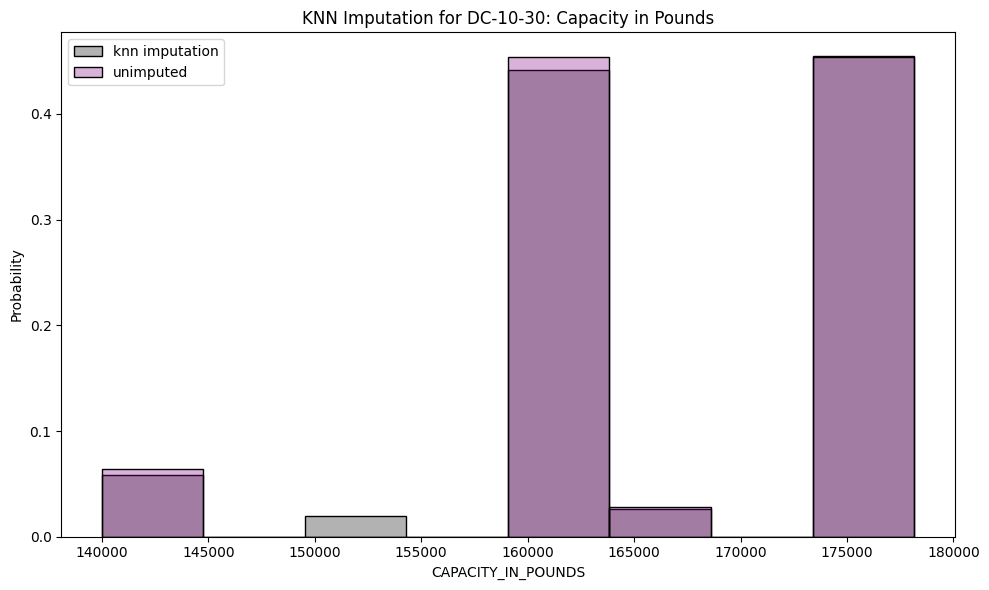

In [1564]:
from sklearn.impute import KNNImputer
dc10_knn = inventory_adjusted[inventory_adjusted['MODEL'] == 'DC-10-30'].select_dtypes('number').copy()
dc10_original = dc10_knn.copy()
knn_imputer = KNNImputer(n_neighbors=5)
dc10_knn_impute = knn_imputer.fit_transform(dc10_knn)

dc10_knn_df = pd.DataFrame(dc10_knn_impute, columns=dc10_knn.columns, index=dc10_knn.index)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(dc10_knn_df['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='k', label='knn imputation')
sns.histplot(dc10_original['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='purple', label='unimputed')
ax.legend()
plt.title('KNN Imputation for DC-10-30: Capacity in Pounds')
plt.tight_layout()
plt.show()

In [1565]:
inventory_adjusted.loc[
    (inventory_adjusted['MODEL'] == 'DC-10-30') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna()),
    'CAPACITY_IN_POUNDS'
] = dc10_knn_df.loc[
    inventory_adjusted[(inventory_adjusted['MODEL'] == 'DC-10-30') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna())].index,
    'CAPACITY_IN_POUNDS'
]

In [1566]:
inventory_adjusted[inventory_adjusted['CAPACITY_IN_POUNDS'].isnull()]['MODEL'].value_counts()

,count
MODEL,
MD-11,57
DC-10-10,26


In [1567]:
inventory_adjusted[(inventory_adjusted['MODEL'] == 'DC-10-10')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
32464,2010,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46601,N365FE,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC-10-10,136842.0,11/6/1997 12:00:00 AM,20107.0,FX
32465,2010,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46602,N366FE,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC-10-10,136662.0,9/26/1997 12:00:00 AM,20107.0,FX
32466,2010,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46605,N367FE,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC-10-10,138160.0,8/4/1997 12:00:00 AM,20107.0,FX
32467,2010,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46606,N368FE,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC-10-10,136438.0,8/21/1997 12:00:00 AM,20107.0,FX
32468,2010,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46607,N369FE,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC-10-10,137462.0,8/21/1997 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96577,2019,FX,Federal Express Corporation,1980.0,Federal Express Corporation,47830,N571FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,136963.0,12/13/1989 12:00:00 AM,20107.0,FX
104027,2020,FX,Federal Express Corporation,1972.0,Federal Express Corporation,46521,N550FE*,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,137752.0,12/13/1989 12:00:00 AM,20107.0,FX
104028,2020,FX,Federal Express Corporation,1973.0,Federal Express Corporation,46616,N383FE*,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,138484.0,3/1/1999 12:00:00 AM,20107.0,FX
104031,2020,FX,Federal Express Corporation,1977.0,Federal Express Corporation,46947,N562FE*,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,137907.0,12/13/1989 12:00:00 AM,20107.0,FX


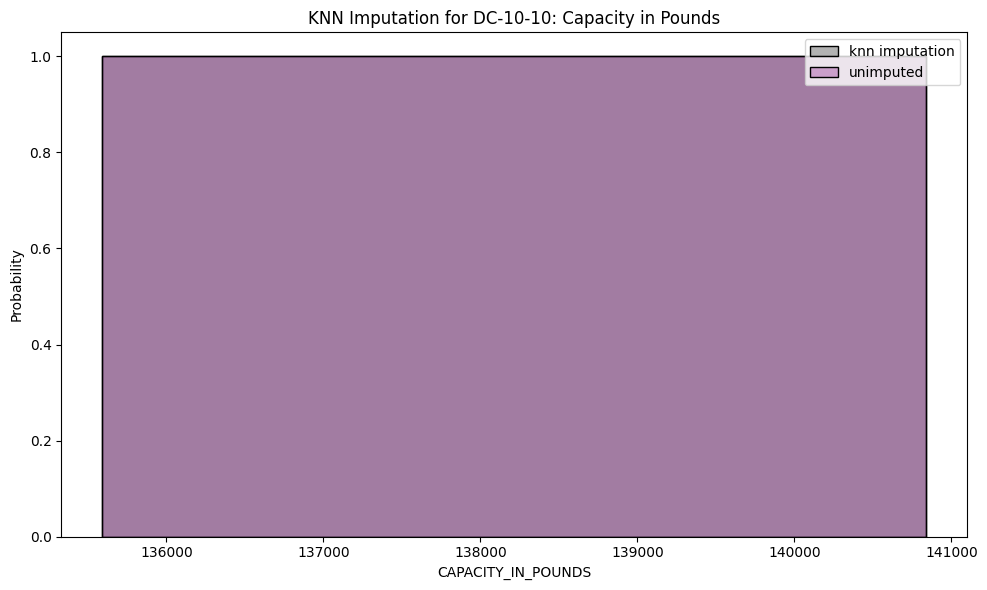

In [1568]:
from sklearn.impute import KNNImputer
dc1010_knn = inventory_adjusted[inventory_adjusted['MODEL'] == 'DC-10-10'].select_dtypes('number').copy()
dc1010_original = dc1010_knn.copy()
knn_imputer_1010 = KNNImputer(n_neighbors=3)
dc1010_knn_impute = knn_imputer_1010.fit_transform(dc1010_knn)

dc1010_knn_df = pd.DataFrame(dc1010_knn_impute, columns=dc1010_knn.columns, index=dc1010_knn.index)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(dc1010_knn_df['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='k', label='knn imputation')
sns.histplot(dc1010_original['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='purple', label='unimputed')
ax.legend()
plt.title('KNN Imputation for DC-10-10: Capacity in Pounds')
plt.tight_layout()
plt.show()

In [1569]:
inventory_adjusted.loc[
    (inventory_adjusted['MODEL'] == 'DC-10-10') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna()),
    'CAPACITY_IN_POUNDS'
] = dc1010_knn_df.loc[
    inventory_adjusted[(inventory_adjusted['MODEL'] == 'DC-10-10') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna())].index,
    'CAPACITY_IN_POUNDS'
]

In [1570]:
inventory_adjusted[inventory_adjusted['CAPACITY_IN_POUNDS'].isnull()]
inventory_adjusted[inventory_adjusted['MODEL']== 'MD-11']['CAPACITY_IN_POUNDS'].value_counts()

,count
CAPACITY_IN_POUNDS,
207179.0,99
194068.0,27
192807.0,13
194779.0,13
196070.0,13
...,...
190414.0,2
205015.0,1
199094.0,1


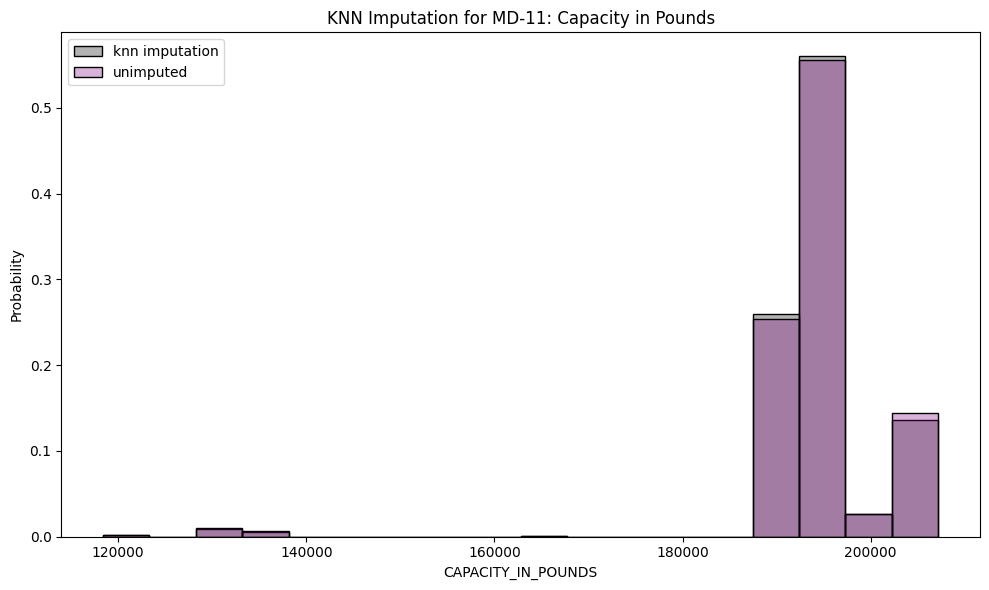

In [1571]:
MD11_knn = inventory_adjusted[inventory_adjusted['MODEL'] == 'MD-11'].select_dtypes('number').copy()
MD11_original = MD11_knn.copy()
knn_imputer_MD11 = KNNImputer(n_neighbors=3)
MD11_knn_impute = knn_imputer_MD11.fit_transform(MD11_knn)

MD11_knn_df = pd.DataFrame(MD11_knn_impute, columns=MD11_knn.columns, index=MD11_knn.index)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(MD11_knn_df['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='k', label='knn imputation')
sns.histplot(MD11_original['CAPACITY_IN_POUNDS'], binwidth=5000, stat='probability', alpha=0.3, color='purple', label='unimputed')
ax.legend()
plt.title('KNN Imputation for MD-11: Capacity in Pounds')
plt.tight_layout()
plt.show()

In [1572]:
inventory_adjusted.loc[
    (inventory_adjusted['MODEL'] == 'MD-11') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna()),
    'CAPACITY_IN_POUNDS'
] = MD11_knn_df.loc[
    inventory_adjusted[(inventory_adjusted['MODEL'] == 'MD-11') & (inventory_adjusted['CAPACITY_IN_POUNDS'].isna())].index,
    'CAPACITY_IN_POUNDS'
]

In [1573]:
inventory_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132313 non-null  object 
 3   MANUFACTURE_YEAR     132313 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132313 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132313 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

To impute missing CAPACITY_IN_POUNDS values for the aircraft models DC-10-10, DC-10-30, and MD-11, the K-Nearest Neighbors (KNN) imputation method was applied. This approach was chosen because each model type had a range of known capacity values, making KNN a helpful method for estimating missing entries based on similar, complete observations. By considering the numerical features of each subset and using the average of the 5 nearest neighbors, the imputation preserved the characteristics of the original data while filling in the gaps. Post-imputation histograms showed strong alignment between the imputed and original distributions, confirming that the method maintained the integrity of the original data.

Airline ID

In [1574]:
inventory_adjusted[inventory_adjusted['AIRLINE_ID'].isnull()]['CARRIER'].value_counts()

,count
CARRIER,
OH,97
L4,8


In [1575]:
inventory_adjusted[inventory_adjusted['AIRLINE_ID'].isnull()]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOMBARDIER,97
DEHAVILLAND,8


In [1576]:
inventory_adjusted[(inventory_adjusted['MANUFACTURER']== 'DEHAVILLAND') & (inventory_adjusted['CARRIER'] == 'L4')]['AIRLINE_ID'].value_counts()

,count
AIRLINE_ID,
21217.0,10


In [1577]:
#all L4 should be 21217.0 because all other Carriers with the same manufacturer have that ID
inventory_adjusted.loc[
    (inventory_adjusted['MANUFACTURER'] == 'DEHAVILLAND') & (inventory_adjusted['AIRLINE_ID'].isna()),
    'AIRLINE_ID'] = 21217.0

In [1578]:
inventory_adjusted[inventory_adjusted['AIRLINE_ID'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
54610,2013,OH,Comair Inc.,1994.0,NaN,7038,N932CA,a,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,4/28/1994 12:00:00 AM,NaN,NaN
54611,2013,OH,Comair Inc.,1994.0,NaN,7042,N934CA,a,N,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,7/6/1994 12:00:00 AM,NaN,NaN
54612,2013,OH,Comair Inc.,1994.0,NaN,7043,N936CA,O,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,7/22/1991 12:00:00 AM,NaN,NaN
54613,2013,OH,Comair Inc.,1994.0,NaN,7044,N937CA,O,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,9/6/1994 12:00:00 AM,NaN,NaN
54614,2013,OH,Comair Inc.,1994.0,NaN,7046,N938CA,O,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,9/26/1994 12:00:00 AM,NaN,NaN
54615,2013,OH,Comair Inc.,1994.0,NaN,7048,N940CA,O,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,10/19/1994 12:00:00 AM,NaN,NaN
54616,2013,OH,Comair Inc.,1994.0,NaN,7050,N941CA,O,Y,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,11/9/1994 12:00:00 AM,NaN,NaN
54617,2013,OH,Comair Inc.,1995.0,NaN,7062,N943CA,a,N,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,3/31/1995 12:00:00 AM,NaN,NaN
54618,2013,OH,Comair Inc.,1995.0,NaN,7069,N945CA,a,N,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,5/30/1995 12:00:00 AM,NaN,NaN
54619,2013,OH,Comair Inc.,1995.0,NaN,7072,N946CA,a,N,50.0,BOMBARDIER,6281,CRJ100-Passanger,47000.0,6/29/1995 12:00:00 AM,NaN,NaN


In [1579]:
inventory_adjusted[inventory_adjusted['AIRLINE_ID'].isnull()]['MODEL'].value_counts()

,count
MODEL,
CRJ100-Passanger,64
CRJ700-Passanger,15
CRJ900-Passanger,13
CRJ200-Passanger,5


In [1580]:
inventory_adjusted[(inventory_adjusted['CARRIER_NAME'] == 'Comair Inc.') & (inventory_adjusted['MODEL'] == 'CRJ100-Passanger')]['UNIQUE_CARRIER'].value_counts()

,count
UNIQUE_CARRIER,
OH (1),130


In [1581]:
inventory_adjusted[(inventory_adjusted['CARRIER_NAME'] == 'Comair Inc.') & (inventory_adjusted['MODEL'] == 'CRJ700-Passanger')]['UNIQUE_CARRIER'].value_counts()

,count
UNIQUE_CARRIER,
OH (1),30


In [1582]:
inventory_adjusted[(inventory_adjusted['CARRIER_NAME'] == 'Comair Inc.') & (inventory_adjusted['MODEL'] == 'CRJ900-Passanger')]['UNIQUE_CARRIER'].value_counts()

,count
UNIQUE_CARRIER,
OH (1),26


In [1583]:
inventory_adjusted[(inventory_adjusted['CARRIER_NAME'] == 'Comair Inc.') & (inventory_adjusted['MODEL'] == 'CRJ200-Passanger')]['UNIQUE_CARRIER'].value_counts()

,count
UNIQUE_CARRIER,
OH (1),11


In [1584]:
inventory_adjusted.loc[
    (inventory_adjusted['CARRIER_NAME'] == 'Comair Inc.') &
    (inventory_adjusted['AIRLINE_ID'].isnull()),
    'AIRLINE_ID'
] = str('OH (1)')

<ipython-input-1584-4239acdcaff3>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'OH (1)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inventory_adjusted.loc[


In [1585]:
inventory_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132313 non-null  object 
 2   CARRIER_NAME         132313 non-null  object 
 3   MANUFACTURE_YEAR     132313 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132313 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132313 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

***Task 2: Data Standardization***

In [1586]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('boeing', case=False, na=False)]['MANUFACTURER'].value_counts()


,count
MANUFACTURER,
BOEING,15922
THEBOEINGCO,9223
Boeing,8392
BoeingCo,7446
BOEINGCOMPANY,6767
BOEING,2811
THEBOEINGCOMPANY,2142
TheBoeingCompany,1833
BoeingCo.,584


In [1587]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('boeing', case=False, na=False),
    'MANUFACTURER'
] = 'Boeing'

In [1588]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Airbus', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
AIRBUS,7179
AirbusIndustries,6967
Airbus,5289
AirbusIndustrie,2666
AIRBUS,963
AirbusCompany,354
AIRBUSINDUSTRIES,86
airbus,9
AirBlue/Airbus,4


In [1589]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Airbus', case=False, na=False),
    'MANUFACTURER'
] = 'Airbus'

In [1590]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Embraer', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Embraer,11508
EMBRAER,3287
EMBRAER,759


In [1591]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Embraer', case=False, na=False),
    'MANUFACTURER'
] = 'Embraer'

In [1592]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Bombardier', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Bombardier,8871
BOMBARDIER,2821
BombardierAerospace,649
BOMBARDIER,142


In [1593]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Bombardier', case=False, na=False),
    'MANUFACTURER'
] = 'Bombardier'

In [1594]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Douglas', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
MCDONNELL-DOUGLAS,3160
MCDONNELLDOUGLAS,2781
McDonnellDouglas,1525
Douglas,990
MCDONNELL-DOUGLAS,941
McDonnelDouglas,736
DOUGLASAIRCRAFT,305
DOUGLAS,147
McDonnell-Douglas,58


In [1595]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Douglas', case=False, na=False),
    'MANUFACTURER'
] = 'McDonnell-Douglas'

In [1596]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Piper', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Piper,20
PIPER,12
PIPER,4


In [1597]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Piper', case=False, na=False),
    'MANUFACTURER'
] = 'Piper'

In [1598]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Lockheed', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Lockheed,129
LOCKHEED,22
LOCKHEED,7


In [1599]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Lockheed', case=False, na=False),
    'MANUFACTURER'
] = 'Lockheed'

In [1600]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Gulfstream', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Gulfstream,417
GULFSTREAM,22
GULFSTREAMAEROSPACECORP,3
GULFSTREAM,2
GULFSTREAMAEROSPACE,2


In [1601]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Gulfstream', case=False, na=False),
    'MANUFACTURER'
] = 'Gulfstream'

In [1602]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Cessna', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
CESSNA,4157
CESSNA,256
Cessna,101


In [1603]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Cessna', case=False, na=False),
    'MANUFACTURER'
] = 'Cessna'

In [1604]:
pd.set_option('display.max_rows', 100)
inventory_adjusted['MANUFACTURER'].value_counts(dropna=False).sort_index()

,count
MANUFACTURER,
AEROSPATIALE,20
ALC,4
ALC/Alaska,16
AMA/EXPR,1
ATR,1103
...,...
easyJet/BBAM,2
easyJet/Fuyo,4
easyJet/GECAS,30


In [1605]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Beech', case=False, na=False),
    'MANUFACTURER'
] = 'Beechcraft'

In [1606]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'].str.contains('Dassault', case=False, na=False)]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Dassault,125
DASSAULT/SUD,5
Dassault/SUD,5
DASSAULT,2
Dassault-Falcon-2000EXEASy,1


In [1607]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Dassault', case=False, na=False),
    'MANUFACTURER'
] = 'Dassault'

In [1608]:
inventory_adjusted['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Boeing,55639
Airbus,23517
Embraer,15554
Bombardier,12483
McDonnell-Douglas,10709
...,...
MCDONNELL,1
SAABScania,1
ISRAELAIRCRAFTINDUSTRIES,1


In [1609]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('mcdonnell', case=False, na=False),
    'MANUFACTURER'
] = 'McDonnell-Douglas'

In [1610]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('saab', case=False, na=False),
    'MANUFACTURER'
] = 'SAAB Aircraft'

In [1611]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('B7', case=False, na=False),
    'MANUFACTURER'
] = 'Boeing'

In [1612]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('mcdonnel', case=False, na=False),
    'MANUFACTURER'
] = 'McDonnell-Douglas'

In [1613]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('fokker', case=False, na=False),
    'MANUFACTURER'
] = 'Fokker'

In [1614]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('jp', case=False, na=False),
    'MANUFACTURER'
] = 'JPLease'

In [1615]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('cssn', case=False, na=False),
    'MANUFACTURER'
] = 'Cessna'

In [1616]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('iai', case=False, na=False),
    'MANUFACTURER'
] = 'Israel Aircraft Industries'

In [1617]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('israel', case=False, na=False),
    'MANUFACTURER'
] = 'Israel Aircraft Industries'

In [1618]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('iberia', case=False, na=False),
    'MANUFACTURER'
] = 'Iberia'

In [1619]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('easy', case=False, na=False),
    'MANUFACTURER'
] = 'Easy Jet'

In [1620]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('cebu', case=False, na=False),
    'MANUFACTURER'
] = 'CebuPacific'

In [1621]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('peach', case=False, na=False),
    'MANUFACTURER'
] = 'Peach'

In [1622]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('Frontier', case=False, na=False),
    'MANUFACTURER'
] = 'Frontier'

In [1623]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('bae', case=False, na=False),
    'MANUFACTURER'
] = 'BAE'

In [1624]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('lear', case=False, na=False),
    'MANUFACTURER'
] = 'Lear Jet'

In [1625]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('smbc', case=False, na=False),
    'MANUFACTURER'
] = 'SMBC'

In [1626]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('vueling', case=False, na=False),
    'MANUFACTURER'
] = 'Vueling'

In [1627]:
inventory_adjusted[
    inventory_adjusted['MANUFACTURER'].str.contains(r'(?<![A-Z])ALC', case=False, na=False, regex=True)
]['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
ALC/Alaska,16
ALC,4


In [1628]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('theon', case=False, na=False),
    'MANUFACTURER'
] = 'Raytheon'

In [1629]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('mcdo', case=False, na=False),
    'MANUFACTURER'
] = 'McDonnel-Douglas'

In [1630]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('gec', case=False, na=False),
    'MANUFACTURER'
] = 'GECAS'

In [1631]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('dehav', case=False, na=False),
    'MANUFACTURER'
] = 'Dehavilland'

In [1632]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('dass', case=False, na=False),
    'MANUFACTURER'
] = 'Dassault'

In [1633]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('chall', case=False, na=False),
    'MANUFACTURER'
] = 'Challenger'

In [1634]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('canad', case=False, na=False),
    'MANUFACTURER'
] = 'Canadair'

In [1635]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('atr', case=False, na=False),
    'MANUFACTURER'
] = 'ATR'

In [1636]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('convair', case=False, na=False),
    'MANUFACTURER'
] = 'Convair'

In [1637]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains('curtis', case=False, na=False),
    'MANUFACTURER'
] = 'Curtiss'

In [1638]:
inventory_adjusted.loc[
    inventory_adjusted['MANUFACTURER'].str.contains(r'(?<![A-Z])ALC', case=False, na=False, regex=True),
    'MANUFACTURER'
] = 'ALC'

In [1639]:
inventory_adjusted['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


In [1640]:
inventory_adjusted.loc[
    inventory_adjusted['AIRCRAFT_STATUS'].str.contains('o', case=False, na=False),
    'AIRCRAFT_STATUS'
] = 'O'

In [1641]:
inventory_adjusted.loc[
    inventory_adjusted['AIRCRAFT_STATUS'].str.contains('b', case=False, na=False),
    'AIRCRAFT_STATUS'
] = 'B'

In [1642]:
inventory_adjusted.loc[
    inventory_adjusted['AIRCRAFT_STATUS'].str.contains('a', case=False, na=False),
    'AIRCRAFT_STATUS'
] = 'A'

In [1643]:
inventory_adjusted.loc[
    inventory_adjusted['OPERATING_STATUS'].str.contains('y', case=False, na=False),
    'OPERATING_STATUS'
] = 'Y'

In [1644]:
inventory_adjusted['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


In [1645]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\b(?:717[-\s]?200|B717[-\s]?200)\b', case=False, na=False),
    'MODEL'
] = '717-200'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(
        r'\b(?:B?717[-\s]?200)(?:[-\s]?P(?:ASSENGER)?(?:ONLY)?|[-\s]?PAX(?:ONLY)?|[-\s]?PSNG(?:ONLY)?)?\b',
        case=False, na=False
    ),
    'MODEL'
] = '717-200_PSGR'

In [1646]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(
        r'\b(?:727[-\s]?233A)(?:[-\s]?(?:CARGO|FREIGHT|ONLY)?)?\b',
        case=False, na=False
    ),
    'MODEL'
] = '727-233ACARGO'

In [1647]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(
        r'\b(?:737[-\s]?700)(?:[-\s]?(?:PSGR|PASSENGER|PAX|PSNG|ONLY)*)?\b',
        case=False, na=False
    ),
    'MODEL'
] = '737-700_PSGR'

In [1648]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(
        r'\b(?:737[-\s]?500)(?:[-\s]?(?:PSGR|PASSENGER|PAX|PSNG|ONLY)*)?\b',
        case=False, na=False
    ),
    'MODEL'
] = '737-500_PSGR'

In [1649]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(
        r'\b(?:737[-\s]?732)(?:[-\s]?(?:PSGR|PASSENGER|PAX|PSNG|ONLY)*)?\b',
        case=False, na=False
    ),
    'MODEL'
] = '737-732_PSGR'

In [1650]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\b(?:EMB|EMBRAER)', case=False, na=False),
    'MODEL'
] = inventory_adjusted['MODEL'].str.replace(
    r'(?i)^(EMB(?:RAER)?)[\s\-]*', 'EMB-', regex=True
)
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-140(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-140'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-145(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-145'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-170(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-170'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-175(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-175'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-190(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-190'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-120(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-120'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'\bEMB-135(?:\b|$)', case=False, na=False),
    'MODEL'
] = 'EMB-135'

In [1651]:
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.contains(r'(?:BOEINGB|BOEING|B)[\s\-]?\d{3}', case=False, na=False),
    'MODEL'
] = inventory_adjusted['MODEL'].str.replace(
    r'(?i)\b(?:BOEINGB|BOEING|B)[\s\-]?(?=\d{3})', '', regex=True
)
inventory_adjusted['MODEL'] = inventory_adjusted['MODEL'].str.replace(
    r'(?i)^BBJ[\s\-]?', '', regex=True
)
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.match(r'^717[-\s]?2(00)?$', case=False, na=False),
    'MODEL'
] = '717-200'
mask = inventory_adjusted['MODEL'].isin(['717-200', '717-2'])
inventory_adjusted.loc[mask, 'MODEL'] = '717-200'
inventory_adjusted.loc[
    inventory_adjusted['MODEL'].str.match(r'^727[-\s]?2(00)?$', case=False, na=False),
    'MODEL'
] = '727-200'

In [1652]:
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-10-1'), 'MODEL' ] =  'DC-10-1'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-10-3'), 'MODEL' ] =  'DC-10-3'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-10-10'), 'MODEL' ] =  'DC-10-10'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-6A'), 'MODEL' ] =  'DC-6A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-10-F'), 'MODEL' ] =  'DC-10-F'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-6B'), 'MODEL' ] =  'DC-6B'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-8-62'), 'MODEL' ] =  'DC-8-62'

inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-8-71'), 'MODEL' ] =  'DC-8-71'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-8-72'), 'MODEL' ] =  'DC-8-72'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-8-73'), 'MODEL' ] =  'DC-8-73'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-8-73F'), 'MODEL' ] =  'DC-8-73F'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-9-10'), 'MODEL' ] =  'DC-9-10'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-9-15F'), 'MODEL' ] =  'DC-9-15F'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-9-30'), 'MODEL' ] =  'DC-9-30'

inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-9-40'), 'MODEL' ] =  'DC-9-40'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC-9-50'), 'MODEL' ] =  'DC-9-50'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC10-10'), 'MODEL' ] =  'DC-10-10'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DC10-30'), 'MODEL' ] =  'DC-10-30'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'MD-11'), 'MODEL' ] =  'MD-11'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'MD-87'), 'MODEL' ] =  'MD-87'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'MD-90'), 'MODEL' ] =  'MD-90'


In [1653]:
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '320-214'), 'MODEL' ] =  'A320-214'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '1900'), 'MODEL' ] =  'BE-1900'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'S-76D'), 'MODEL' ] =  'SK-76-D'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'G280'), 'MODEL' ] =  'GULFSTREAMG280'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '737-4PSGR'), 'MODEL' ] =  '737-400-PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '737-400PSGR'), 'MODEL' ] =  '737-400-PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '737-800PSGR'), 'MODEL' ] =  '737-800-PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '737-700_PSGR'), 'MODEL' ] =  '737-700-PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'LEAR-25'), 'MODEL' ] =  'LEAR25'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'LR-45-75PSGR'), 'MODEL' ] =  'LEAR-45-75PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'LEAR-60'), 'MODEL' ] =  'LEAR60'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '800XP'), 'MODEL' ] =  'Hawker800XP'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'HAWKER800XP'), 'MODEL' ] =  'Hawker800XP'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '800XP	'), 'MODEL' ] =  'Hawker800XP'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'FOKR 100'), 'MODEL' ] =  'FOKKR100'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CHALLENGER300'), 'MODEL' ] =  'CHAL-300'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CHAL300'), 'MODEL' ] =  'CHAL-300'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '6011A'), 'MODEL' ] =  '601-1A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'L-382/B'), 'MODEL' ] =  'L-382B'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '382G-44K-30'), 'MODEL' ] =  'L-382G-44K-30'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'L100-30	'), 'MODEL' ] =  'L100-30'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'FALCON '), 'MODEL' ] =  'FALCON'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'FALCON200'), 'MODEL' ] =  'DASSAULT-FALCON-2000'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'Falcon2000'), 'MODEL' ] =  'DASSAULT-FALCON-2000'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'FALCON2000	'), 'MODEL' ] =  'DASSAULT-FALCON-2000'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DASSAULT-FALCON-2000'), 'MODEL' ] =  'DASSAULT-FALCON-2000'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CV-580-CARGO'), 'MODEL' ] =  'CV580-CARGO'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CV5800-CARGO	'), 'MODEL' ] =  'CV580-CARGO'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CV-580'), 'MODEL' ] =  'CV580'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CV-580 '), 'MODEL' ] =  'CV580'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'SF-340/A'), 'MODEL' ] =  'SF-340A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'SAAB340A'), 'MODEL' ] =  'SF-340A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'SF340A'), 'MODEL' ] =  'SF-340A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'Saab340'), 'MODEL' ] =  'SF-340'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'Saab340B'), 'MODEL' ] =  'SF-340B'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '340bPSGR'), 'MODEL' ] =  'SF-340B-PSGR'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'SF-340 '), 'MODEL' ] =  'SF-340'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DHC8-400 '), 'MODEL' ] =  'DHC8-400'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DHC8-200 '), 'MODEL' ] =  'DHC8-200'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'DH8-200'), 'MODEL' ] =  'DHC8-200'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'ATR72'), 'MODEL' ] =  'ATR-72'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'ATR72-212A	'), 'MODEL' ] =  'ATR-72-212A'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'ATR-72 '), 'MODEL' ] =  'ATR-72'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CRJ200'), 'MODEL' ] =  'RJ-200'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CRJ700'), 'MODEL' ] =  'RJ-700'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == 'CE-208B'), 'MODEL' ] =  'C-208B'
inventory_adjusted.loc[(inventory_adjusted['MODEL'] == '208B'), 'MODEL' ] =  'C-208B'


In [1654]:
inventory_adjusted[inventory_adjusted['MANUFACTURER'] == 'Bombardier']['MODEL'].value_counts()

,count
MODEL,
CRJ200-2B19,1169
CRJ-200,1148
CRJ-900LR-PSGR,976
CRJ-700,880
CRJ-200-PSGR,861
CRJ-900-PSGR,745
CRJ700-2C10,729
CL65,682
CRJ-900,607


In [1655]:
inventory_adjusted['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
Boeing,55640
Airbus,23517
Embraer,15554
Bombardier,12483
McDonnel-Douglas,10812
Cessna,4515
Canadair,3861
ATR,1181
GE,1110


***Task 3***

In [1656]:
inventory_cleaned = inventory_adjusted.dropna()
inventory_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101305 entries, 29239 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 101305 non-null  int64  
 1   CARRIER              101305 non-null  object 
 2   CARRIER_NAME         101305 non-null  object 
 3   MANUFACTURE_YEAR     101305 non-null  float64
 4   UNIQUE_CARRIER_NAME  101305 non-null  object 
 5   SERIAL_NUMBER        101305 non-null  object 
 6   TAIL_NUMBER          101305 non-null  object 
 7   AIRCRAFT_STATUS      101305 non-null  object 
 8   OPERATING_STATUS     101305 non-null  object 
 9   NUMBER_OF_SEATS      101305 non-null  float64
 10  MANUFACTURER         101305 non-null  object 
 11  AIRCRAFT_TYPE        101305 non-null  object 
 12  MODEL                101305 non-null  object 
 13  CAPACITY_IN_POUNDS   101305 non-null  float64
 14  ACQUISITION_DATE     101305 non-null  object 
 15  AIRLINE_ID        

***Part 4: Transformation and Derivative Variables***

In [1657]:
from scipy.stats import skew
seats_skew = skew(inventory_cleaned['NUMBER_OF_SEATS'])
seats_skew

np.float64(0.377931635914363)

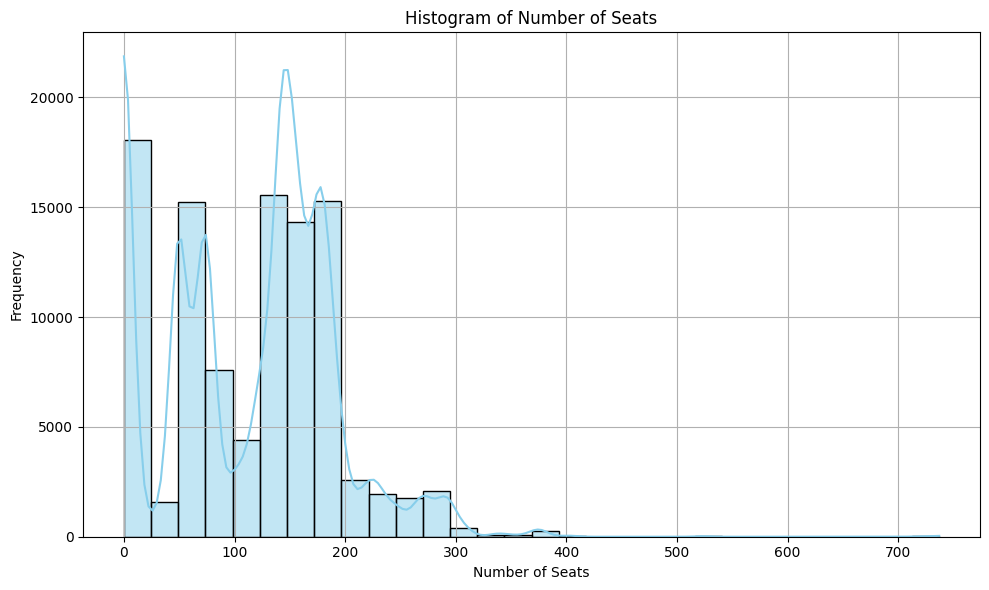

In [1658]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_cleaned['NUMBER_OF_SEATS'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1659]:
from scipy.stats import skew
capacity_skew = skew(inventory_cleaned['CAPACITY_IN_POUNDS'])
capacity_skew

np.float64(3.760037224843854)

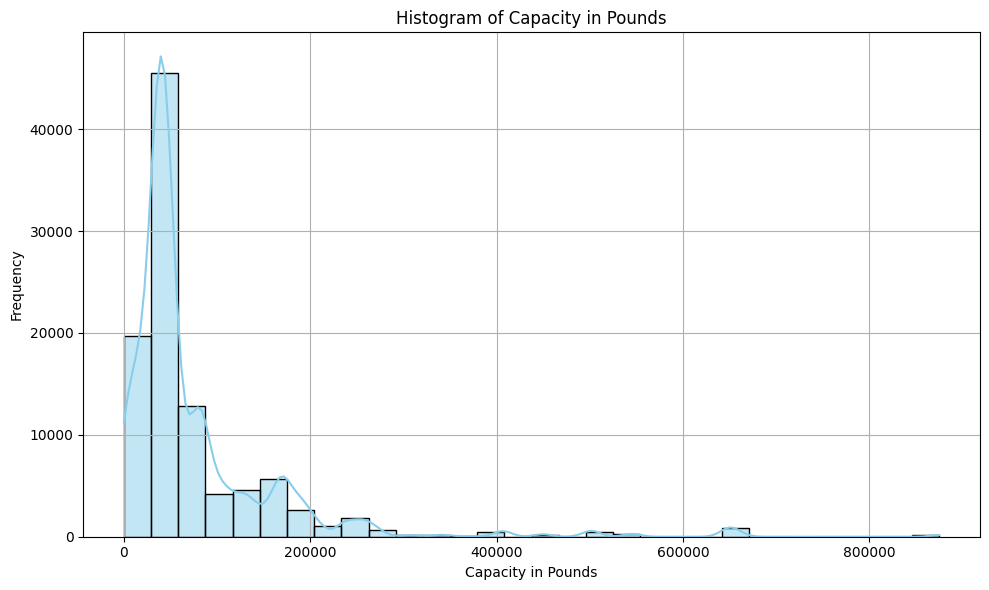

In [1660]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_cleaned['CAPACITY_IN_POUNDS'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Capacity in Pounds')
plt.xlabel('Capacity in Pounds')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1661]:
from scipy.stats import boxcox

inventory_cleaned = inventory_cleaned.copy()

inventory_cleaned['NUMBER_OF_SEATS_BOXCOX'], lambda_seats = boxcox(inventory_cleaned['NUMBER_OF_SEATS'] + 1e-6)
inventory_cleaned['CAPACITY_IN_POUNDS_BOXCOX'], lambda_capacity = boxcox(inventory_cleaned['CAPACITY_IN_POUNDS'] + 1e-6)


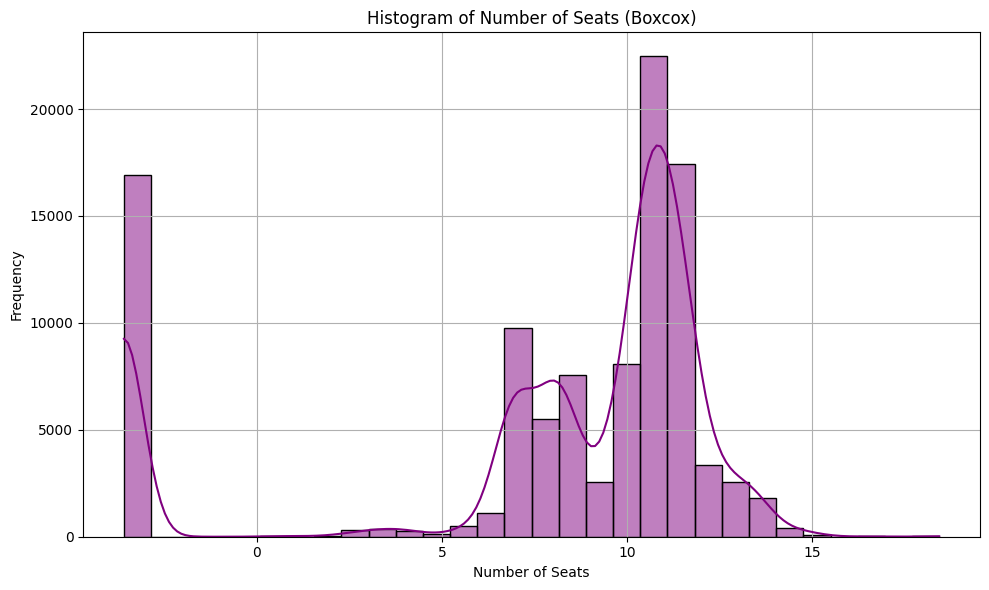

In [1662]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_cleaned['NUMBER_OF_SEATS_BOXCOX'], bins=30, kde=True, color='purple')
plt.title('Histogram of Number of Seats (Boxcox)')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

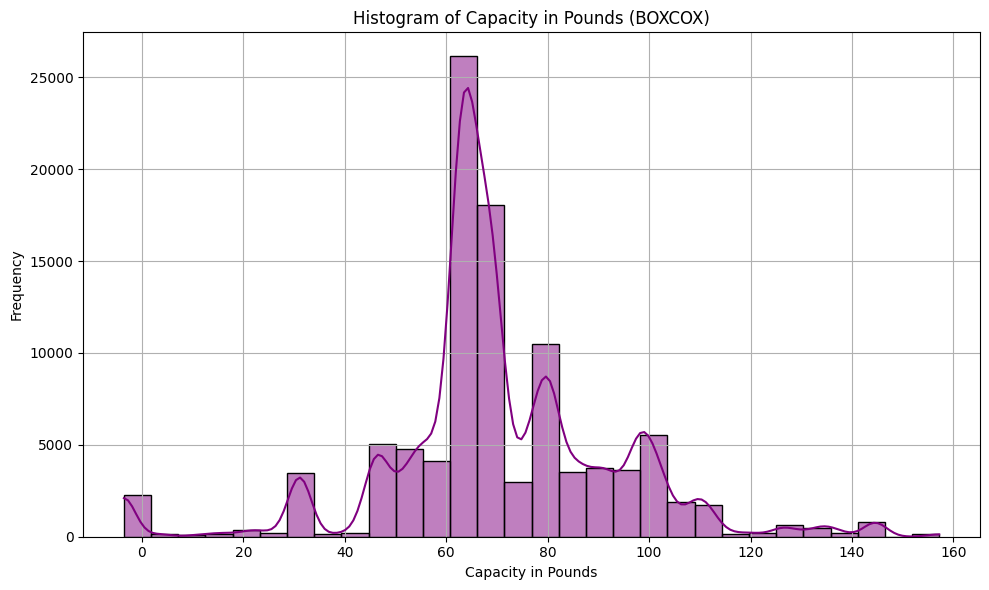

In [1663]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_cleaned['CAPACITY_IN_POUNDS_BOXCOX'], bins=30, kde=True, color='purple')
plt.title('Histogram of Capacity in Pounds (BOXCOX)')
plt.xlabel('Capacity in Pounds')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Before transformation, both the NUMBER_OF_SEATS and the CAPACITY_IN_POUNDS were skewed right, with NUMBER_OF_SEATS having a smaller skew (.378) and CAPACITY_IN_POUNDS being more heavily skewed (3.76). Post transformation, both histograms were a lot closer to normal visually, although NUMBER_OF_SEATS appears to have a large outlier of 0 while the rest are centered around 11. CAPACITY_IN_POUNDS is more evenly spread from 0 to 160000 pounds centered around 65.

***Part 5: Feature Engineering***

In [1664]:
percentile_25 = inventory_cleaned['NUMBER_OF_SEATS'].quantile(0.25)
percentile_50 = inventory_cleaned['NUMBER_OF_SEATS'].quantile(0.50)
percentile_75 = inventory_cleaned['NUMBER_OF_SEATS'].quantile(0.75)

inventory_cleaned['SIZE'] = pd.cut(
    inventory_cleaned['NUMBER_OF_SEATS'],
    bins=[-float('inf'), percentile_25, percentile_50, percentile_75, float('inf')],
    labels=['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']
)
inventory_cleaned['SIZE'].value_counts()


,count
SIZE,
SMALL,29319
LARGE,25687
XLARGE,24938
MEDIUM,21361


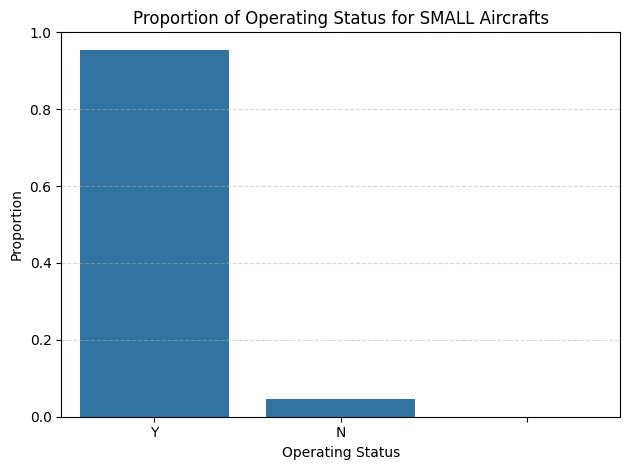

In [1665]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'SMALL']['OPERATING_STATUS'].value_counts()
small_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'SMALL']['OPERATING_STATUS'].value_counts(normalize=True)

sns.barplot(x=small_props.index, y=small_props.values)
plt.title('Proportion of Operating Status for SMALL Aircrafts')
plt.xlabel('Operating Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

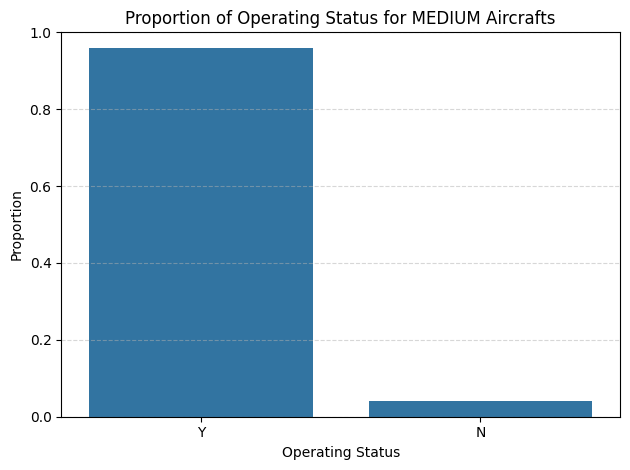

In [1666]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'MEDIUM']['OPERATING_STATUS'].value_counts()
med_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'MEDIUM']['OPERATING_STATUS'].value_counts(normalize=True)

sns.barplot(x=med_props.index, y=med_props.values)
plt.title('Proportion of Operating Status for MEDIUM Aircrafts')
plt.xlabel('Operating Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

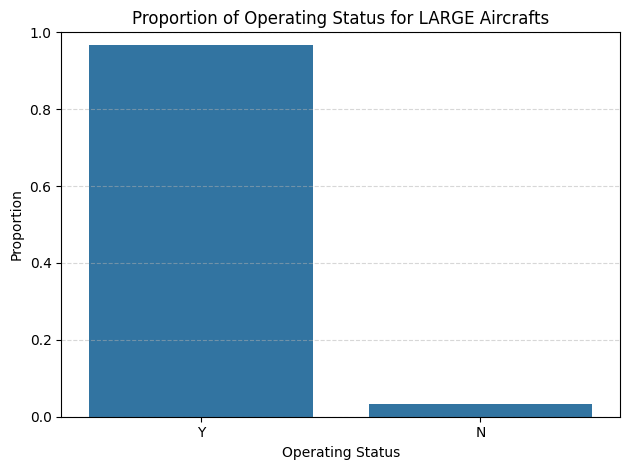

In [1667]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'LARGE']['OPERATING_STATUS'].value_counts()
large_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'LARGE']['OPERATING_STATUS'].value_counts(normalize=True)

sns.barplot(x=large_props.index, y=large_props.values)
plt.title('Proportion of Operating Status for LARGE Aircrafts')
plt.xlabel('Operating Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

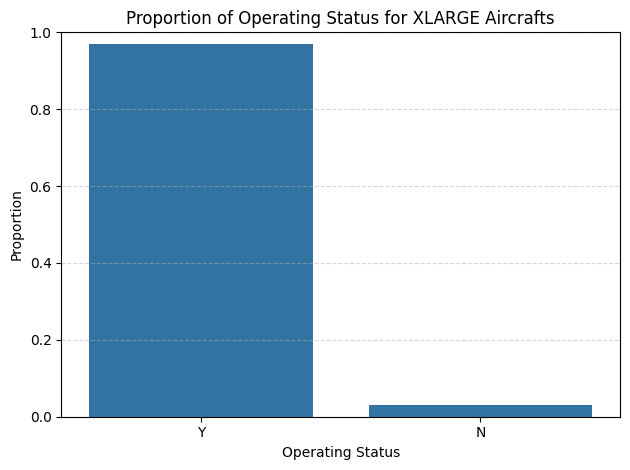

In [1668]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'XLARGE']['OPERATING_STATUS'].value_counts()
xlarge_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'XLARGE']['OPERATING_STATUS'].value_counts(normalize=True)

sns.barplot(x=xlarge_props.index, y=xlarge_props.values)
plt.title('Proportion of Operating Status for XLARGE Aircrafts')
plt.xlabel('Operating Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

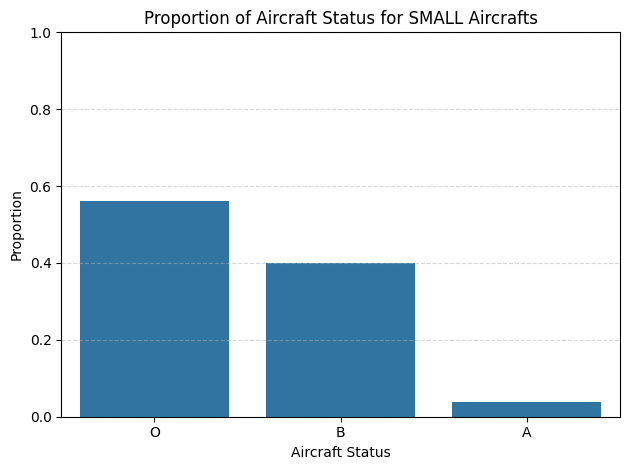

In [1669]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'SMALL']['AIRCRAFT_STATUS'].value_counts()
small_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'SMALL']['AIRCRAFT_STATUS'].value_counts(normalize=True)

sns.barplot(x=small_props.index, y=small_props.values)
plt.title('Proportion of Aircraft Status for SMALL Aircrafts')
plt.xlabel('Aircraft Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

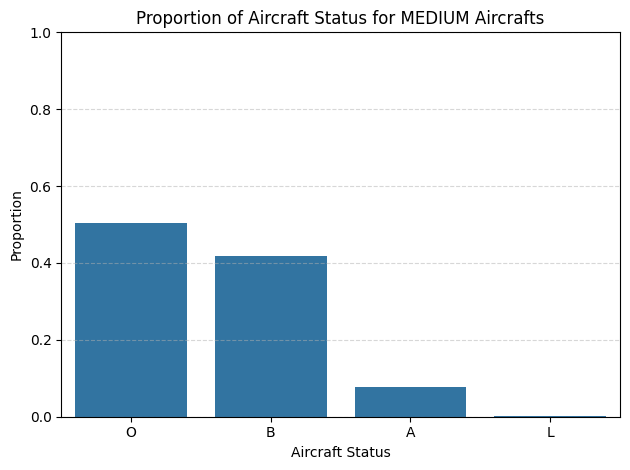

In [1670]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'MEDIUM']['AIRCRAFT_STATUS'].value_counts()
med_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'MEDIUM']['AIRCRAFT_STATUS'].value_counts(normalize=True)

sns.barplot(x=med_props.index, y=med_props.values)
plt.title('Proportion of Aircraft Status for MEDIUM Aircrafts')
plt.xlabel('Aircraft Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

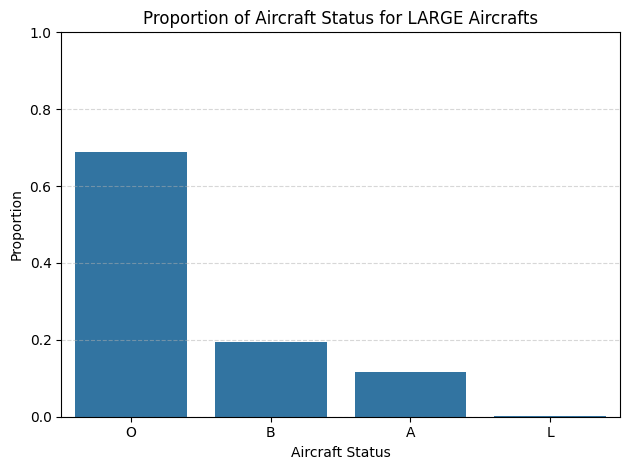

In [1671]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'LARGE']['AIRCRAFT_STATUS'].value_counts()
large_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'LARGE']['AIRCRAFT_STATUS'].value_counts(normalize=True)

sns.barplot(x=large_props.index, y=large_props.values)
plt.title('Proportion of Aircraft Status for LARGE Aircrafts')
plt.xlabel('Aircraft Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

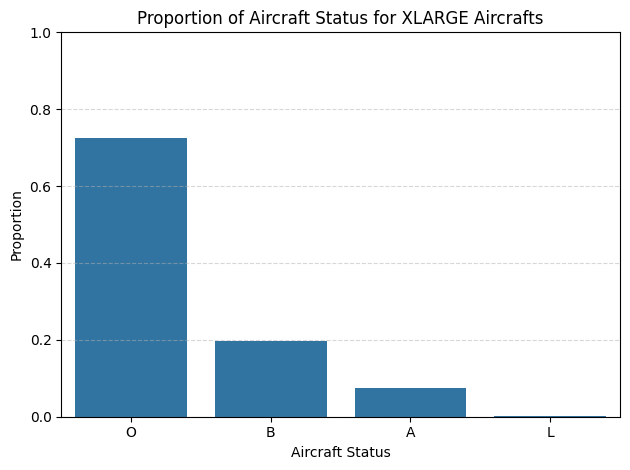

In [1672]:
inventory_cleaned[inventory_cleaned['SIZE'] == 'XLARGE']['AIRCRAFT_STATUS'].value_counts()
xlarge_props = inventory_cleaned[inventory_cleaned['SIZE'] == 'XLARGE']['AIRCRAFT_STATUS'].value_counts(normalize=True)

sns.barplot(x=xlarge_props.index, y=xlarge_props.values)
plt.title('Proportion of Aircraft Status for XLARGE Aircrafts')
plt.xlabel('Aircraft Status')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Across all size categories, over 90% of aircraft are operational, with many categories exceeding 95%, suggesting that planes of all sizes are generally in active use. Focusing on aircraft status within the SMALL size category, statuses O (Operational) and B (Being Worked On) are nearly evenly split — O accounts for about 50% and B just over 40%. Status A (Available) makes up less than 5%, while L (Left Fleet) is not represented.
As aircraft size increases, the proportion of O steadily rises — from 50% in SMALL to over 70% in XLARGE — while B shows a noticeable decline, dropping from over 40% in SMALL to about 20% in XLARGE. The proportion of A remains relatively stable, with a modest increase from about 5% to just under 10%. Interestingly, L status appears only in the MEDIUM to XLARGE categories, though in very small proportions, around 1%.